# DFBA
This section describes how to run dynamic FBA (DFBA) with `sbmlutils`.

In [1]:
from __future__ import absolute_import, print_function
import os

from sbmlutils import dfba
from sbmlutils.dfba import utils

## Toy example

Create directory: /tmp/tmpEjlf1s/v9
Flattened model written to /tmp/tmpEjlf1s/v9/toy_flattened.xml
/tmp/tmpEjlf1s/v9/toy_fba.xml
/tmp/tmpEjlf1s/v9/toy_bounds.xml
/tmp/tmpEjlf1s/v9/toy_update.xml
/tmp/tmpEjlf1s/v9/toy_top.xml
/tmp/tmpEjlf1s/v9/toy_flattened.xml
/tmp/tmpEjlf1s/v9/toy_top.xml

Simulation time     : 0.276 [s]
Total time          : 0.845 [s]
Overhead time       : 0.570 [s] (67.4 %)



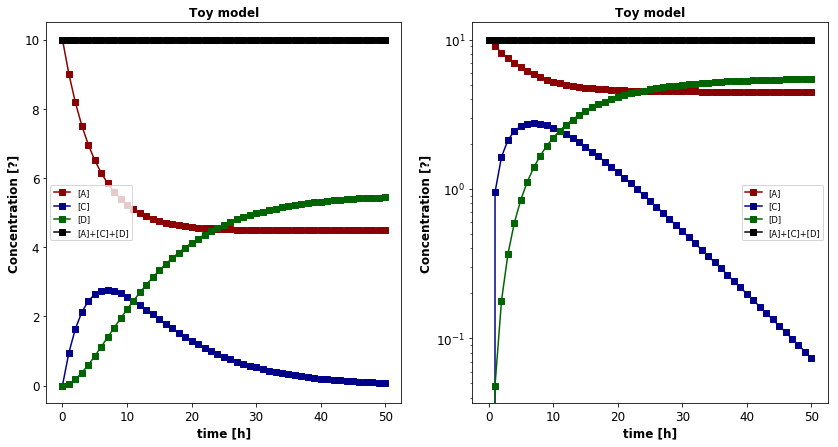

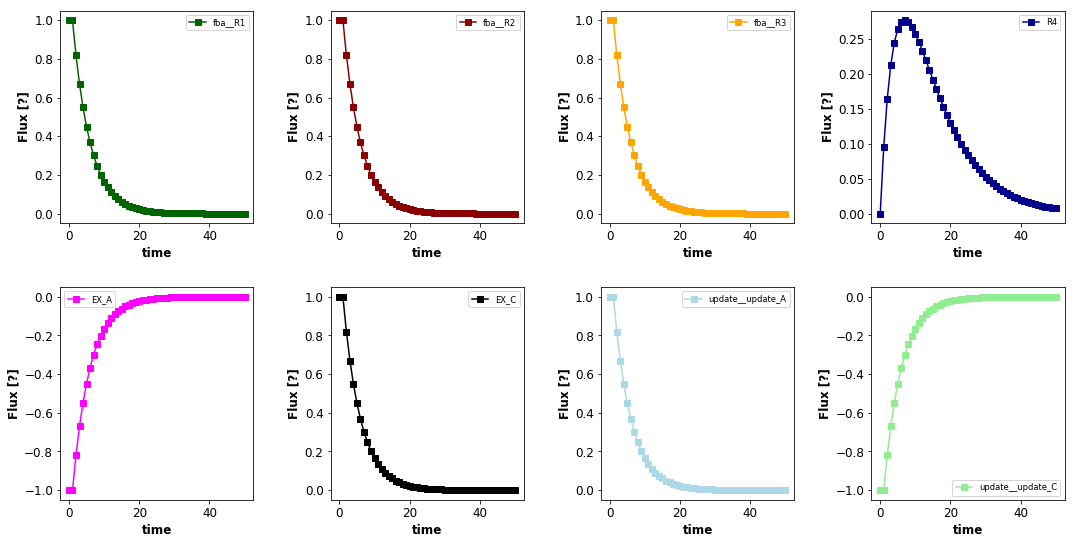

     time        [A]       [C]       [D]  [dummy_S]  [fba__A]  [fba__B1]  \
0.0   0.0  10.000000  0.000000  0.000000        0.0       0.0        0.0   
1.0   1.0   9.000000  0.951626  0.048374        0.0       0.0        0.0   
2.0   2.0   8.181269  1.640192  0.178539        0.0       0.0        0.0   
3.0   3.0   7.510949  2.122001  0.367049        0.0       0.0        0.0   
4.0   4.0   6.962138  2.442333  0.595529        0.0       0.0        0.0   

     [fba__B2]  [fba__C]      EX_A    ...     fba__ub_default  fba__zero  \
0.0        0.0       0.0 -1.000000    ...              1000.0        0.0   
1.0        0.0       0.0 -1.000000    ...              1000.0        0.0   
2.0        0.0       0.0 -0.818731    ...              1000.0        0.0   
3.0        0.0       0.0 -0.670320    ...              1000.0        0.0   
4.0        0.0       0.0 -0.548811    ...              1000.0        0.0   

     k_R4     lb_EX_A    lb_EX_C     pEX_A     pEX_C  ub_EX_A  ub_EX_C  \
0.0   0.1 -1

In [2]:
from sbmlutils.dfba.toy import settings as toysettings
from sbmlutils.dfba.toy import model_factory as toyfactory
from sbmlutils.dfba.toy import simulate as toysimulate

import tempfile
test_dir = tempfile.mkdtemp()

# create the toy model
toyfactory.create_model(test_dir)
# here the files are generated
sbml_path = os.path.join(utils.versioned_directory(test_dir, toyfactory.version),
                         toysettings.top_file)
print(sbml_path)
# simulate
dfs = toysimulate.simulate_toy(sbml_path, test_dir, dts=[1.0], figures=False)

toysimulate.print_species(dfs=dfs)
toysimulate.print_fluxes(dfs=dfs)
print(dfs[0].head())

## Diauxic growth

Create directory: /tmp/tmp_eEVOk/v11
Flattened model written to /tmp/tmp_eEVOk/v11/diauxic_flattened.xml
/tmp/tmp_eEVOk/v11/diauxic_fba.xml
/tmp/tmp_eEVOk/v11/diauxic_bounds.xml
/tmp/tmp_eEVOk/v11/diauxic_update.xml
/tmp/tmp_eEVOk/v11/diauxic_top.xml
/tmp/tmp_eEVOk/v11/diauxic_flattened.xml
/tmp/tmp_eEVOk/v11/diauxic_top.xml

Simulation time     : 4.381 [s]
Total time          : 4.936 [s]
Overhead time       : 0.555 [s] (11.2 %)



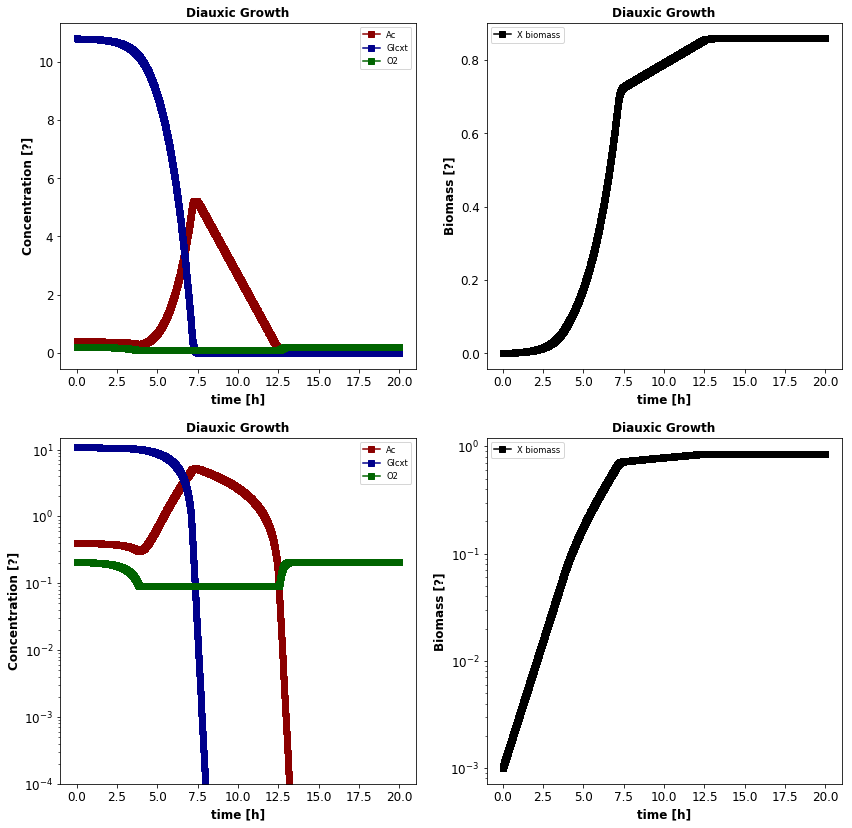

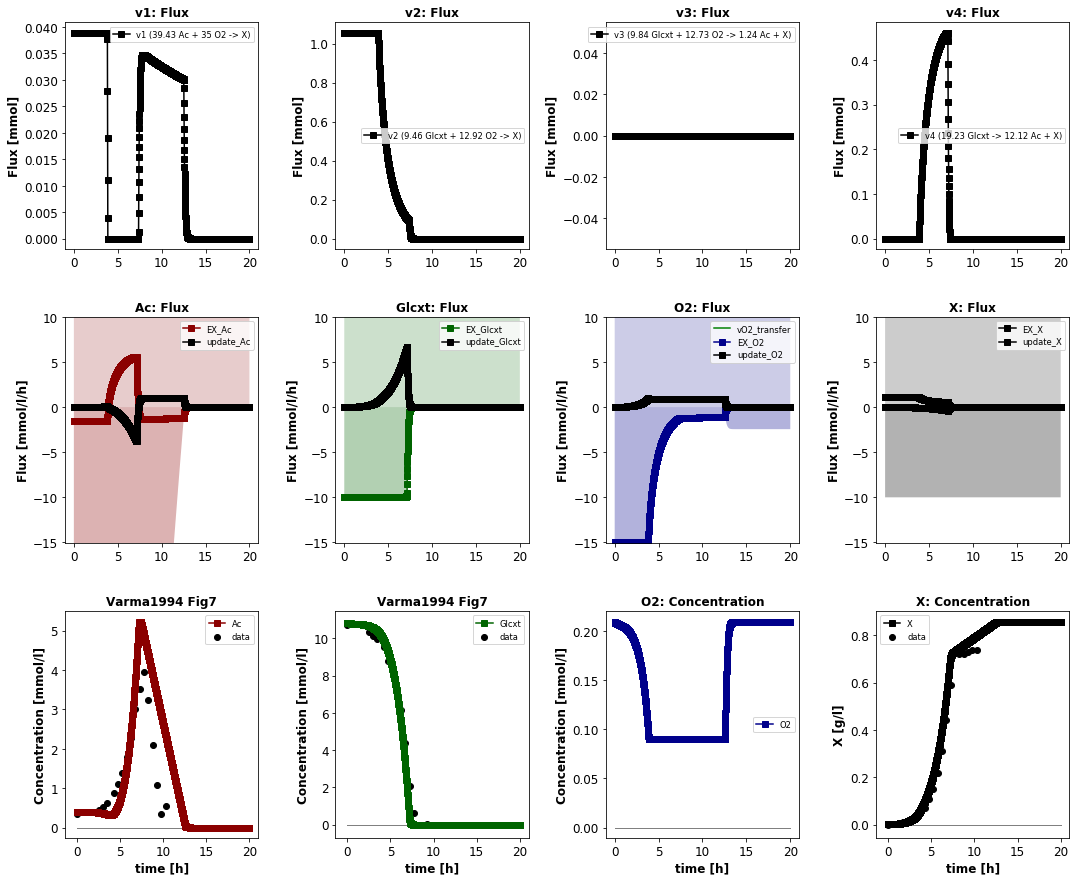

      time      [Ac]    [Glcxt]      [O2]       [X]  [dummy_S]  [fba__Ac]  \
0.00  0.00  0.400000  10.800000  0.210000  0.001000        0.0        0.0   
0.01  0.01  0.399985  10.799900  0.209855  0.001011        0.0        0.0   
0.02  0.02  0.399969  10.799798  0.209719  0.001022        0.0        0.0   
0.03  0.03  0.399953  10.799695  0.209591  0.001033        0.0        0.0   
0.04  0.04  0.399937  10.799592  0.209470  0.001045        0.0        0.0   

      [fba__Glcxt]  [fba__O2]  [fba__X]   ...     lb_EX_O2  lb_EX_X    pEX_Ac  \
0.00           0.0        0.0       0.0   ...        -15.0    -10.0 -1.533756   
0.01           0.0        0.0       0.0   ...        -15.0    -10.0 -1.533756   
0.02           0.0        0.0       0.0   ...        -15.0    -10.0 -1.533756   
0.03           0.0        0.0       0.0   ...        -15.0    -10.0 -1.533757   
0.04           0.0        0.0       0.0   ...        -15.0    -10.0 -1.533757   

      pEX_Glcxt  pEX_O2     pEX_X  ub_EX_Ac  ub_EX

In [3]:
from sbmlutils.dfba.diauxic_growth import dgsettings
from sbmlutils.dfba.diauxic_growth import model_factory as dgfactory
from sbmlutils.dfba.diauxic_growth import simulate as dgsimulate
from sbmlutils.dfba.diauxic_growth import analyse as dganalyse

import tempfile
test_dir = tempfile.mkdtemp()

# create the model
dgfactory.create_model(test_dir)

# top model file
sbml_path = os.path.join(utils.versioned_directory(test_dir, dgfactory.version),
                         dgsettings.top_file)
print(sbml_path)

# run DFBA
dfs = dgsimulate.simulate_diauxic_growth(sbml_path, test_dir, dts=[0.01], figures=False)

# plot results
dganalyse.print_species(dfs=dfs)
dganalyse.print_fluxes(dfs=dfs)
print(dfs[0].head())